<a href="https://colab.research.google.com/github/MoronSlayer/Deep-Learning-Projects/blob/learner/541_HW_1_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import struct
import numpy as np
from array import array as pyarray

In [ ]:
/content/t10k-images-idx3-ubyte.gz

In [1]:
# !curl -O http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
# !curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
# !curl -O http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
# !curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4542  100  4542    0     0  79684      0 --:--:-- --:--:-- --:--:-- 79684
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28881  100 28881    0     0   157k      0 --:--:-- --:--:-- --:--:--  157k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1610k  100 1610k    0     0  7156k      0 --:--:-- --:--:-- --:--:-- 7124k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9680k  100 9680k    0     0  22.3M      0 --:--:-- --:--:-- --:--:-- 22.3M


In [ ]:
!gunzip t*-ubyte.gz


In [ ]:
print('Dimensions: %s x %s' % (X.shape[0], X.shape[1]))
print('\n1st row', X[0])


In [2]:
import numpy as np 
import torch 
from torchvision import datasets,transforms
import matplotlib.pyplot as plt 
import seaborn as sns
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler

In [4]:
import pandas.util.testing as tm


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """Entry point for launching an IPython kernel.


In [4]:
transform=transforms.Compose([transforms.ToTensor()])


In [45]:
(train_data[1][0]).shape

torch.Size([1, 28, 28])

In [46]:
(train_data[1][0].reshape(-1,784)).shape

torch.Size([1, 784])

In [42]:
labels = []
images = []
for i in range(len(train_data)):
  image = train_data[i][0]
  image = image.reshape(-1,784).tolist()
  label = train_data[i][1]
  images.append(image[0])
  labels.append(label)

In [41]:
print(images[1])

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [21]:
print(test_data[0][1])

7


In [5]:
train_data=datasets.MNIST('data',train=True,download=True,transform=transform)
test_data=datasets.MNIST('data',train=False,download=True,transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [14]:
print("Length of train:" ,len(train_data)  ,"\nLength of test:", len(test_data))

Length of train 60000 
Length of test 10000


In [18]:
from torch.utils.data import random_split 

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(   images, labels,train_size=15000,test_size=2500, random_state=42)

In [48]:
train_test_split??


Object `train_test_split` not found.


In [53]:
X_train = np.array(X_train)
X_test = np.array(X_test)


In [54]:
X_train.shape,X_test.shape

((15000, 784), (2500, 784))

In [ ]:
train_dataset, test_dataset = random_split(sonar_dataset, [train_size, test_size])


In [7]:
valid_size=0.2

# IMPORTANT 
batch_size=20

num_workers=0

train_length = len(train_data)

# obtain training dataset indices that will be used for validation dataset
indices = list(range(train_length))

np.random.shuffle(indices)
split = int(np.floor(valid_size * train_length))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders for train, test and validation dataset
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

In [8]:
train_idx.__len__(),valid_idx.__len__()


(48000, 12000)

In [9]:
len(train_loader),len(valid_loader),len(test_loader)


(2400, 600, 500)

In [ ]:
import matplotlib.pyplot as plt


3
AxesImage(54,36;334.8x217.44)
3
AxesImage(54,36;334.8x217.44)
8
AxesImage(54,36;334.8x217.44)
4
AxesImage(54,36;334.8x217.44)
5
AxesImage(54,36;334.8x217.44)
6
AxesImage(54,36;334.8x217.44)
3
AxesImage(54,36;334.8x217.44)
7
AxesImage(54,36;334.8x217.44)
4
AxesImage(54,36;334.8x217.44)
9
AxesImage(54,36;334.8x217.44)


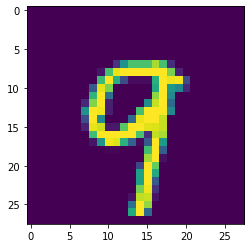

In [61]:
for i in range(10):
  image = X_train[i]
  image = image.reshape(28,28)
  print(y_train[i])
  print(plt.imshow(image))

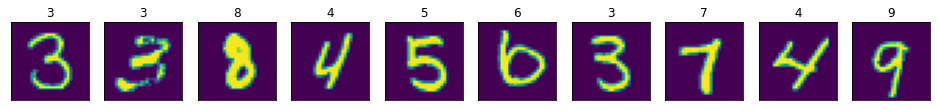

In [80]:
fig=plt.figure(figsize=(50,20))
for i in range(10):
    image = X_train[i]
    image = image.reshape(28,28)
    ax=fig.add_subplot(2,30,i+1,xticks=[],yticks=[])
    plt.imshow(image)
    ax.set_title(y_train[i],color='black')

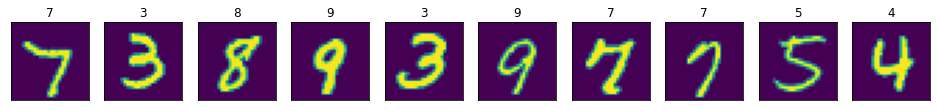

In [81]:
fig=plt.figure(figsize=(50,30))
for i in range(10):
    image = X_test[i]
    image = image.reshape(28,28)
    ax=fig.add_subplot(5,30,i+1,xticks=[],yticks=[])
    plt.imshow(image)
    ax.set_title(y_test[i],color='black')

In [86]:
from sklearn.preprocessing import normalize
X_train = normalize(X_train,norm = 'l2')
X_test = normalize(X_test,norm = 'l2')

In [87]:
print(X_test[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
dataiter=iter(train_loader)
images,labels=dataiter.next()
print(images, images.shape, len(images), images[0].shape)
# print()
print(labels,labels.shape,len(labels))

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

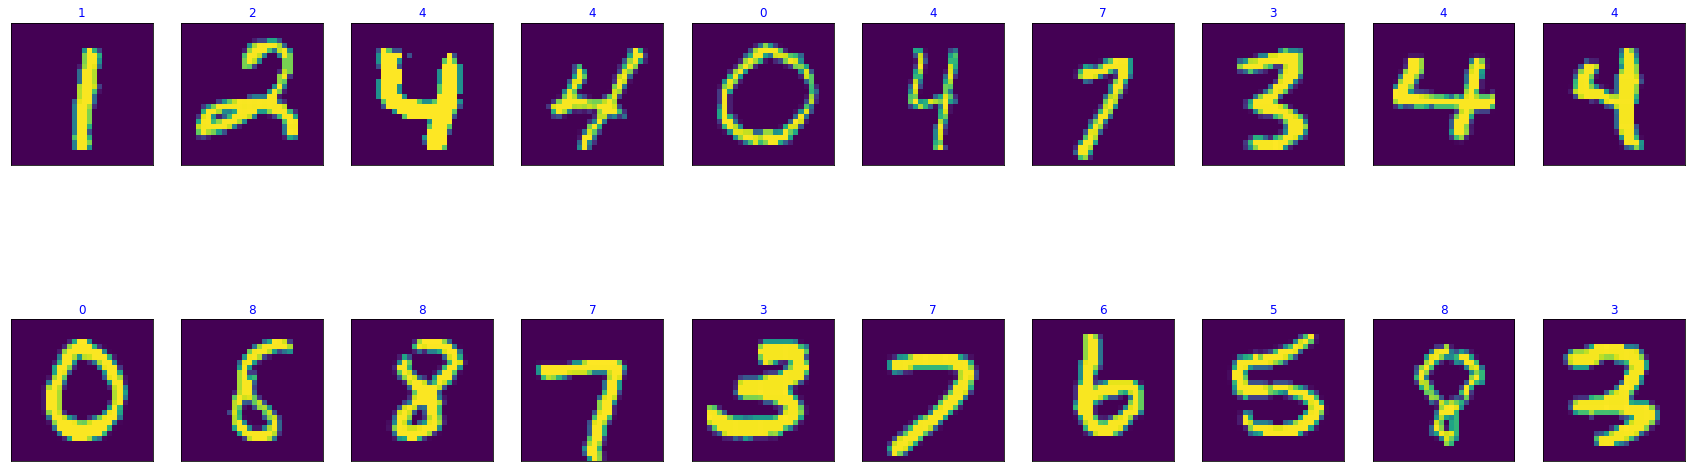

In [11]:
# Displaying images and labels of a batch
fig=plt.figure(figsize=(30,10))
for i in range(len(labels)):
    ax=fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
    plt.imshow(np.squeeze(images[i]))
    ax.set_title(labels[i].item(),color='blue')